# Questions

In [58]:
#Read the column description and ensure you understand each attribute well
#Study the data distribution in each attribute, share your findings. (5 points)
#Get the target column distribution. Your comments
#Split the data into training and test set in the ratio of 70:30 respectively
#Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (15 points)
#Print the confusion matrix for all the above models (5 points)

# Data Descriptions

In [59]:
#ID	Customer ID
#Age	Customer's age in completed years
#Experience	#years of professional experience
#Income	Annual income of the customer ($000)
#ZIPCode	Home Address ZIP code.
#Family	Family size of the customer
#CCAvg	Avg. spending on credit cards per month ($000)
#Education	Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
#Mortgage	Value of house mortgage if any. ($000)
#Personal Loan	Did this customer accept the personal loan offered in the last campaign?
#Securities Account	Does the customer have a securities account with the bank?
#CD Account	Does the customer have a certificate of deposit (CD) account with the bank?
#Online	Does the customer use internet banking facilities?
#CreditCard	Does the customer use a credit card issued by UniversalBank?


In [60]:
# Importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Reading the data
df = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')

In [61]:
#rows and columns count
df.shape

(5000, 14)

In [62]:
#checking for null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [63]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# Checking all the unique values of the columns

In [64]:
for col in list(df):
    print(col)
    print(df[col].unique())
    print("----------------------------------------------------------------------")

ID
[   1    2    3 ... 4998 4999 5000]
----------------------------------------------------------------------
Age
[25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23]
----------------------------------------------------------------------
Experience
[ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 -1 34  0 38 40 33  4 -2 42 -3 43]
----------------------------------------------------------------------
Income
[ 49  34  11 100  45  29  72  22  81 180 105 114  40 112 130 193  21  25
  63  62  43 152  83 158  48 119  35  41  18  50 121  71 141  80  84  60
 132 104  52 194   8 131 190  44 139  93 188  39 125  32  20 115  69  85
 135  12 133  19  82 109  42  78  51 113 118  64 161  94  15  74  30  38
   9  92  61  73  70 149  98 128  31  58  54 124 163  24  79 134  23  13
 138 171 168  65  10 148 159 169 144 165  59  68  91 172  55 155  53  89
  28  

In [65]:
#experience column has neagative values and hence needs to be fixed

In [68]:
df[df['Experience'] < 0]['Experience'].count() #number of rows with negative experience

52

In [69]:
#there are 52 records with negative experience

In [70]:
#clean the negative variable
df_exp = df.loc[df['Experience'] > 0]

In [71]:
neg_exp = df.Experience < 0
column_name = 'Experience'
mylist = df.loc[neg_exp]['ID'].tolist() # getting the customer ID who has negative experience

In [72]:
neg_exp.value_counts() #negative experience count

False    4948
True       52
Name: Experience, dtype: int64

In [73]:
#fixing the negative values with the median of respective columns

for id in mylist:
    age = df.loc[np.where(df['ID']==id)]["Age"].tolist()[0] # For the record with the ID, get the value of Age column
    education = df.loc[np.where(df['ID']==id)]["Education"].tolist()[0] # For the record with the ID, get the value of Education column
    df_filtered = df_exp[(df_exp.Age == age) & (df_exp.Education == education)] # Filter the records matching the above criteria from the data frame which has records with positive experience and take the median
    exp = df_filtered['Experience'].median() #calculate the median
    df.loc[df.loc[np.where(df['ID']==id)].index, 'Experience'] = exp #Apply the median back to the location which had negative experience


In [74]:
# checking if there are records with negative experience
df[df['Experience'] < 0]['Experience'].count()

0

In [75]:
#5 point summary
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,4971.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.243211,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.359189,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


C:\Users\91996\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\91996\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\91996\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


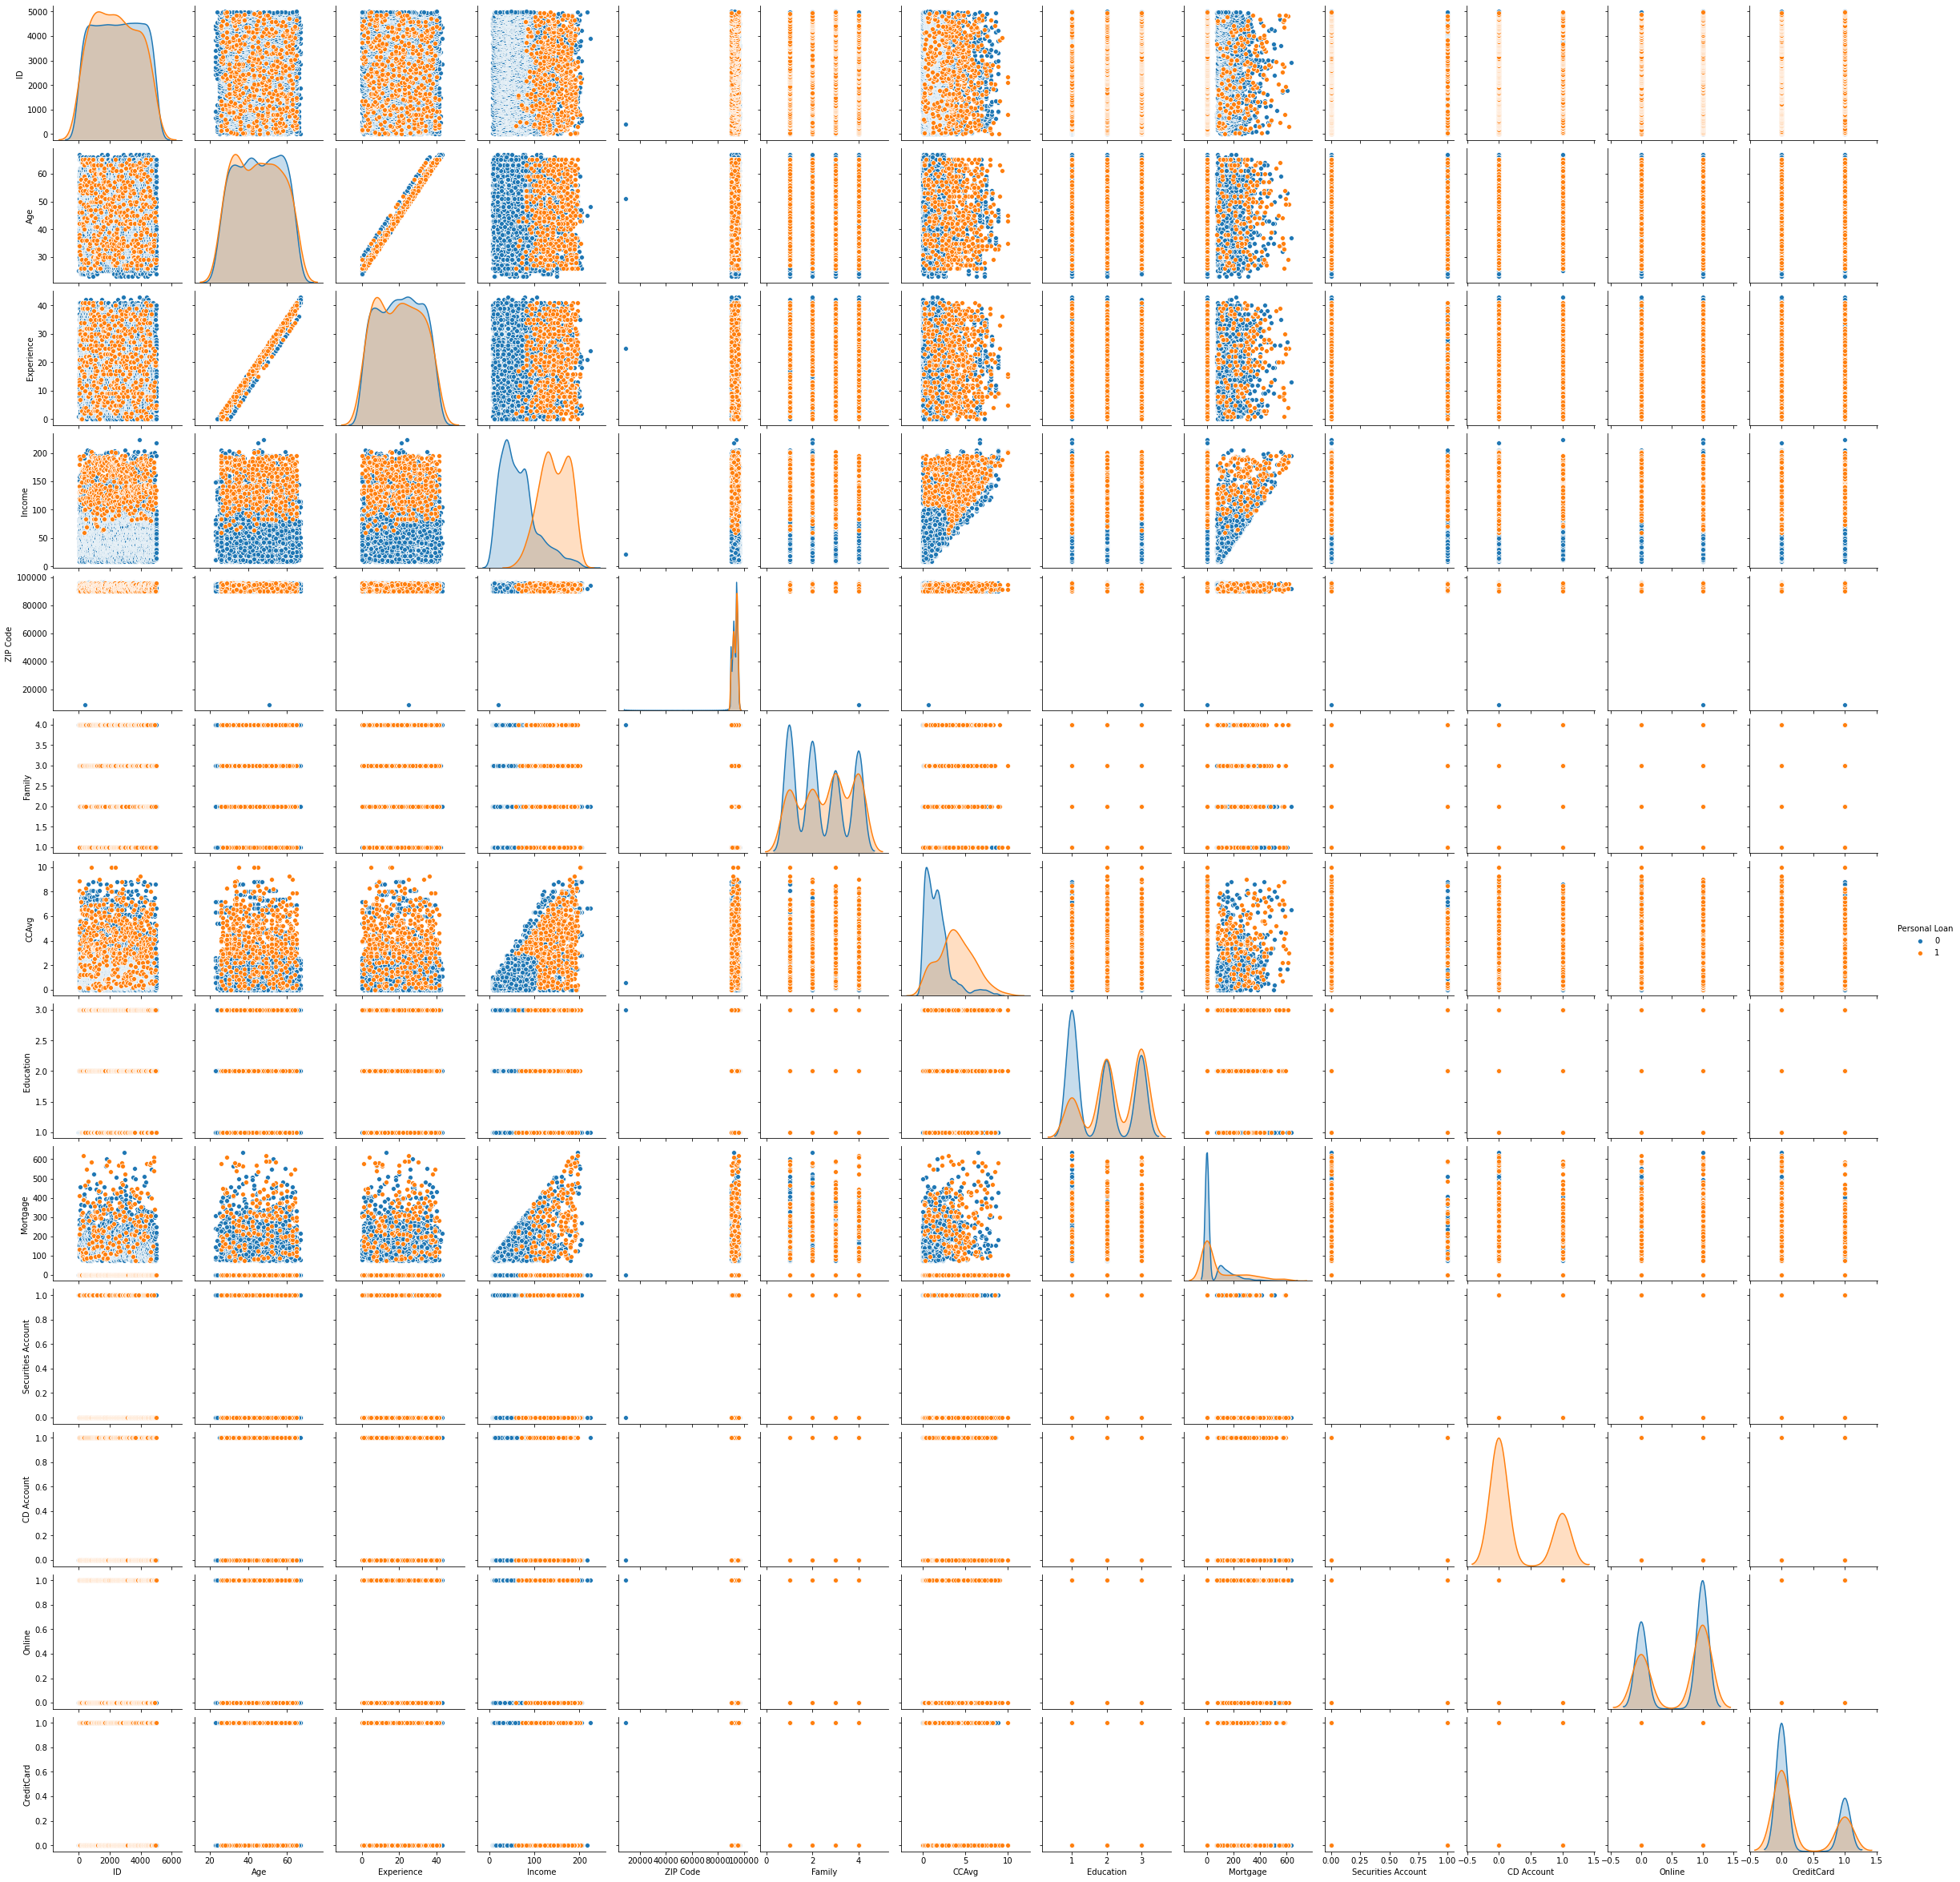

In [76]:
sns.pairplot(df,hue='Personal Loan')

In [77]:
#from the above plot it can be seen that income and education (1) attribute separates customers who have taken 
#personal loan from those who have not taken clearly as compared to other attributes.
#CDAccount can also be used as an important differentiator

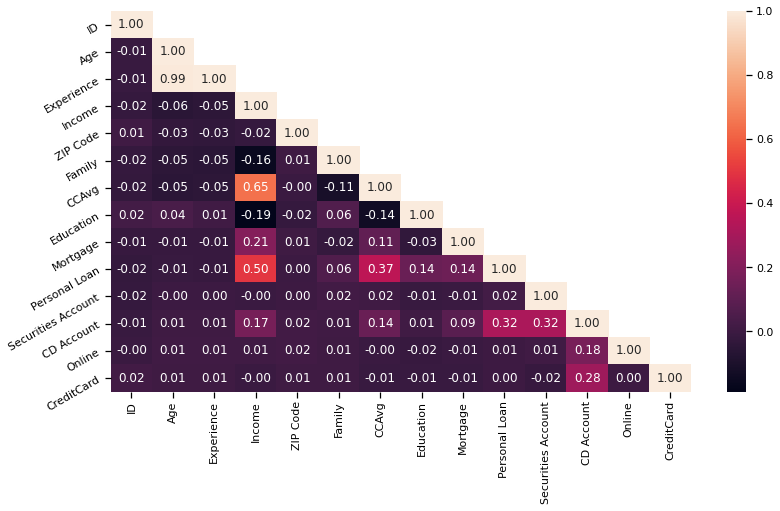

In [78]:
#Plotting the correlation heat map
corr = df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [79]:
#from the above plot experience and age have a positive correlation & income and CCAvg is moderately correlated.

In [80]:
df.dtypes

ID                      int64
Age                     int64
Experience            float64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

### Analyszing each column

In [148]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

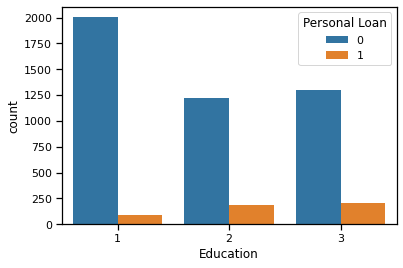

In [165]:
sns.countplot(x="Education", data=df,hue="Personal Loan")

In [ ]:
#customers with education level 1 have the least loan

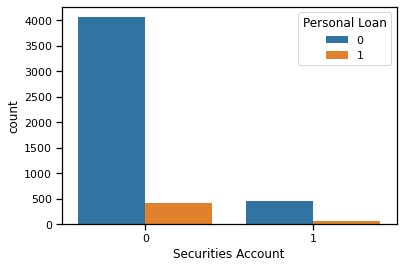

In [157]:
sns.countplot(x="Securities Account", data=df,hue="Personal Loan")

In [ ]:
#customers who do not possess Security account have loan compared to those who have

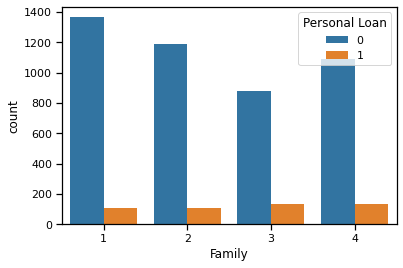

In [166]:
sns.countplot(x='Family',data=df,hue='Personal Loan')

In [167]:
# family size does not have a major role, lowever there is a slight increase in loan buyers who have a family of 3.

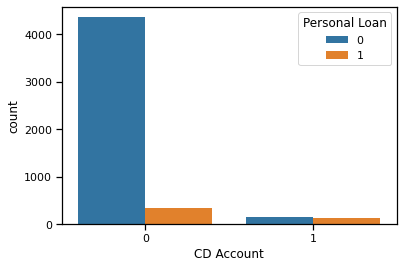

In [168]:
sns.countplot(x='CD Account',data=df,hue='Personal Loan')

In [169]:
# almost all customers who has CD account has loan as well

# Preparing data for KNN model

In [81]:
#for KNN we need to apply Z score for normalization

In [82]:
from scipy.stats import zscore

In [83]:
df_z = df.apply(zscore)  # convert all attributes to Z scale 
df_z.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5.000000e+03,5.000000e+03,0.0,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,-2.047251e-17,2.478018e-17,NaN,1.939449e-16,1.513445e-15,7.850609e-16,-2.078338e-17,-6.315837e-16,2.810197e-16,-5.565326e-16,5.092149e-16,4.426903e-16,2.986500e-16,-3.697931e-16
std,1.000100e+00,1.000100e+00,NaN,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.731704e+00,-1.948906e+00,NaN,-1.428969e+00,-3.951919e+01,-1.216855e+00,-1.108987e+00,-1.049078e+00,-5.555239e-01,-3.258753e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01
25%,-8.658522e-01,-9.019702e-01,NaN,-7.554825e-01,-5.851619e-01,-1.216855e+00,-7.084116e-01,-1.049078e+00,-5.555239e-01,-3.258753e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01
50%,0.000000e+00,-2.952359e-02,NaN,-2.123482e-01,1.340930e-01,-3.454321e-01,-2.506106e-01,1.417029e-01,-5.555239e-01,-3.258753e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,-6.453143e-01
75%,8.658522e-01,8.429230e-01,NaN,5.263146e-01,6.860245e-01,5.259909e-01,3.216407e-01,1.332484e+00,4.375576e-01,-3.258753e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,1.549632e+00
max,1.731704e+00,1.889859e+00,NaN,3.263712e+00,1.648959e+00,1.397414e+00,4.613525e+00,1.332484e+00,5.688108e+00,3.068659e+00,2.928915e+00,3.944146e+00,8.219509e-01,1.549632e+00


### Splitting the target and independent attribute

In [84]:
X = df_z.drop(['Personal Loan','ID','Experience'], axis=1)

In [85]:
y = df["Personal Loan"]

# Splitting the data

In [91]:
#importing library for train test split
from sklearn.model_selection import train_test_split

In [92]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [93]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3500, 11)
(1500, 11)
(3500,)
(1500,)


# KNN

In [139]:
from sklearn.neighbors import KNeighborsClassifier

In [140]:
#KNN model
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
#look for 5 nearest neighbors
#weights is based on distance calculation

In [141]:
# Call Nearest Neighbour algorithm
NNH.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [142]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point
KNN_predict = NNH.predict(X_test)
#scoring compares what has been predicted to what it actually should be
#in the next step it will assign labels to the test data and those labels will be compared with the actual labels
NNH.score(X_test, y_test)

0.9526666666666667

# Logistic Regression

In [129]:
X = df.drop(['Personal Loan','ID','Experience'], axis=1)

In [130]:
y = df["Personal Loan"]

In [131]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [120]:
from sklearn.linear_model import LogisticRegression

In [121]:
# Fit the model on 30%
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [122]:
model_score = model.score(X_test, y_test)
print(model_score)

0.908


In [123]:
#its observed that when not considering Z score normalization in Logistic Regression Model 
#the accuracy of the model reduces by almost 5%
#hence applying Z score

In [133]:
X = df_z.drop(['Personal Loan','ID','Experience'], axis=1)

In [134]:
y = df["Personal Loan"]

In [135]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [144]:
# Fit the model on 30%
model = LogisticRegression()
model.fit(X_train, y_train)
LR_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)

0.9486666666666667


# Naive Bayes

In [146]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

NB_model = GaussianNB()
NB_model.fit(X_train, y_train)
NB_predict = NB_model.predict(X_test)
NB_model_score = NB_model.score(X_test, y_test)
print(NB_model_score)

0.8746666666666667


# Confusion Matrix

In [ ]:
# calculate confusion matrix
from sklearn import metrics

### KNN

In [143]:
print(metrics.confusion_matrix(y_test, KNN_predict))

[[1343    8]
 [  63   86]]


### Logistic Regression

In [145]:
print(metrics.confusion_matrix(y_test, LR_predict))

[[1336   15]
 [  62   87]]


### Naive Bayes

In [147]:
print(metrics.confusion_matrix(y_test, NB_predict))

[[1230  121]
 [  67   82]]
